# Importing libraries

In [3]:
import pandas as pd # for data handling and importing csv file
import numpy as np  # for maths mostly
import matplotlib.pyplot as plt #for plotting and visualisation
import seaborn as sns # same as matplotlib but advanced
from sklearn.datasets import load_diabetes # we export our diabetes dataset from SKlearn 
%matplotlib inline 
# magic line only works in Jupyter Notebook - for inline plot showing

##### OK so Before heading towards out data loading let's first get an idea about our diabetes dataset which is avaiable at SkLearn
##### Understand that it is a Object not a dataframe (we need to convert it to one) - it has 3 things:
1. ##### `data` : Out feature Matrix (X)
2. ##### `target` : Disease Progression Measure (as the sklearn documentation calls it)
3. ##### `feature_names` : Names of features (as you will see now)
##### So basically we gotta use individually extract them and put it together in a dataframe 

In [5]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

#### Inference: 
##### We get an idea about our dataset - the features which are given below (tho keep in mind most are 
##### labelled like s1 to 6 so for now we mostly get a gist that we need to figure out ourselves using data 
##### manipulation which features are important to us
---

#### FEATURES: 
##### Age,Sex,Body mass index (`bmi`), Average blood pressure(`bp`), Total serum cholesterol (`s1`), Low-density Lipoproteins(`s2`), 
##### High-density Lipoproteins(`s3`), Total Cholesterol / HDL(`s4`), Possibly log of serum triglycerides level(`s5`), Blood Sugar Level(`s6`)

##### One more thing that we have is out Outcome / `target` column which is gonna be our y (if you understand the notation) 

---

##### And NOTICE that it's not discrete (0 or 1 or basically a category) and rather it's Continuous Values 
##### What we can infer from this is that we are not supposed to determine if they are diabetic or not (Classification) rather we have to find how much diabetic they are, I guess ( Regression)

# A lil' Data Check 

In [8]:
df.shape #Checking how many rows and columns

(442, 11)

##### This suggests that we got 442 samples and 11 columns (10 Features + 1 Target) in our dataset  (a tuple)
##### How about we once check if there are any null or NaN values in our dataset (missing values) so that we can handle them

In [10]:
df.isnull().sum() #To check total no of null values in our dataset

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

##### Seems like we got no null values (which is actually good)

In [12]:
df.isna().sum() #Let's do same for NaN values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

##### Great! None here too 
--- 
##### Tho keep in mind `isna()` and `isnull` are same thing We just did it for fun (not really tho)

In [14]:
df.describe() #Let's check some mathematical properties about our dataset (in a sort ig)

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [15]:
df.info() #Gives pretty much info about each column (Feature) and so we get the idea if there's any null value or not or what the datatype of each feature is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


##### No Null values in any column and all of them features are float values which is good as we wont need to convert them to numerical values 

## Removing Outliers 
#### (unexpected stuff and ye they ruin my dataset i am pretty sure i dont want them)

In [44]:
no_of_outliers = {}

for col in df.columns[:-1]: # not used target
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    no_of_outliers[col] = outliers.shape[0]
print("Lower bound: ",lower_bound) 
print("Upper bound: ",upper_bound)
print("No Of Outliers:")
print(pd.Series(no_of_outliers))

Lower bound:  -0.12482314158114535
Upper bound:  0.11956116639408756
No Of Outliers:
age    0
sex    0
bmi    3
bp     0
s1     8
s2     7
s3     7
s4     2
s5     4
s6     9
dtype: int64


##### Checking if there's any outliers and it seems like there are in `bmi`, `s1`, `s2`,`s3`,`s4`,`s5` and `s6` columns 



##### Btw a quick note- We used IQR Method for outlier detection (IQR - Interquartile Range)
##### IQR is the range bw middle 50% of data (from `describe()` method)
##### Q1 is the 25the percentile and Q3 is 75th percentile and Now IQR is Q3-Q1 (spread of middle 50%) we use `quantile` method of pandas for that 
---
#### Why use Q1 and Q3?
##### Well mostly cuz you may notice that most of the data lies within q1 and q3 iske bahar ka sab anamoly ho skta or a rare values

In [20]:
df_capped = df.copy()

for col in df.columns[:-1]:  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower_bound, upper_bound)

##### Now we cap these values (basically if they are out of range we bring them in range instead of removing them cuz data will remain as it is without the need to delete useful data

In [47]:
no_of_outliers = {}
# Checking whether all outliers are gone or not

# M-1


for col in df_capped.columns[:-1]: # not used target (ofc why delete from them)
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_capped[(df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)]
    no_of_outliers[col] = outliers.shape[0]

print("No Of Outliers:")
print(pd.Series(no_of_outliers))

No Of Outliers:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


##### Great! Let's try another method for our outliers using Boxplot

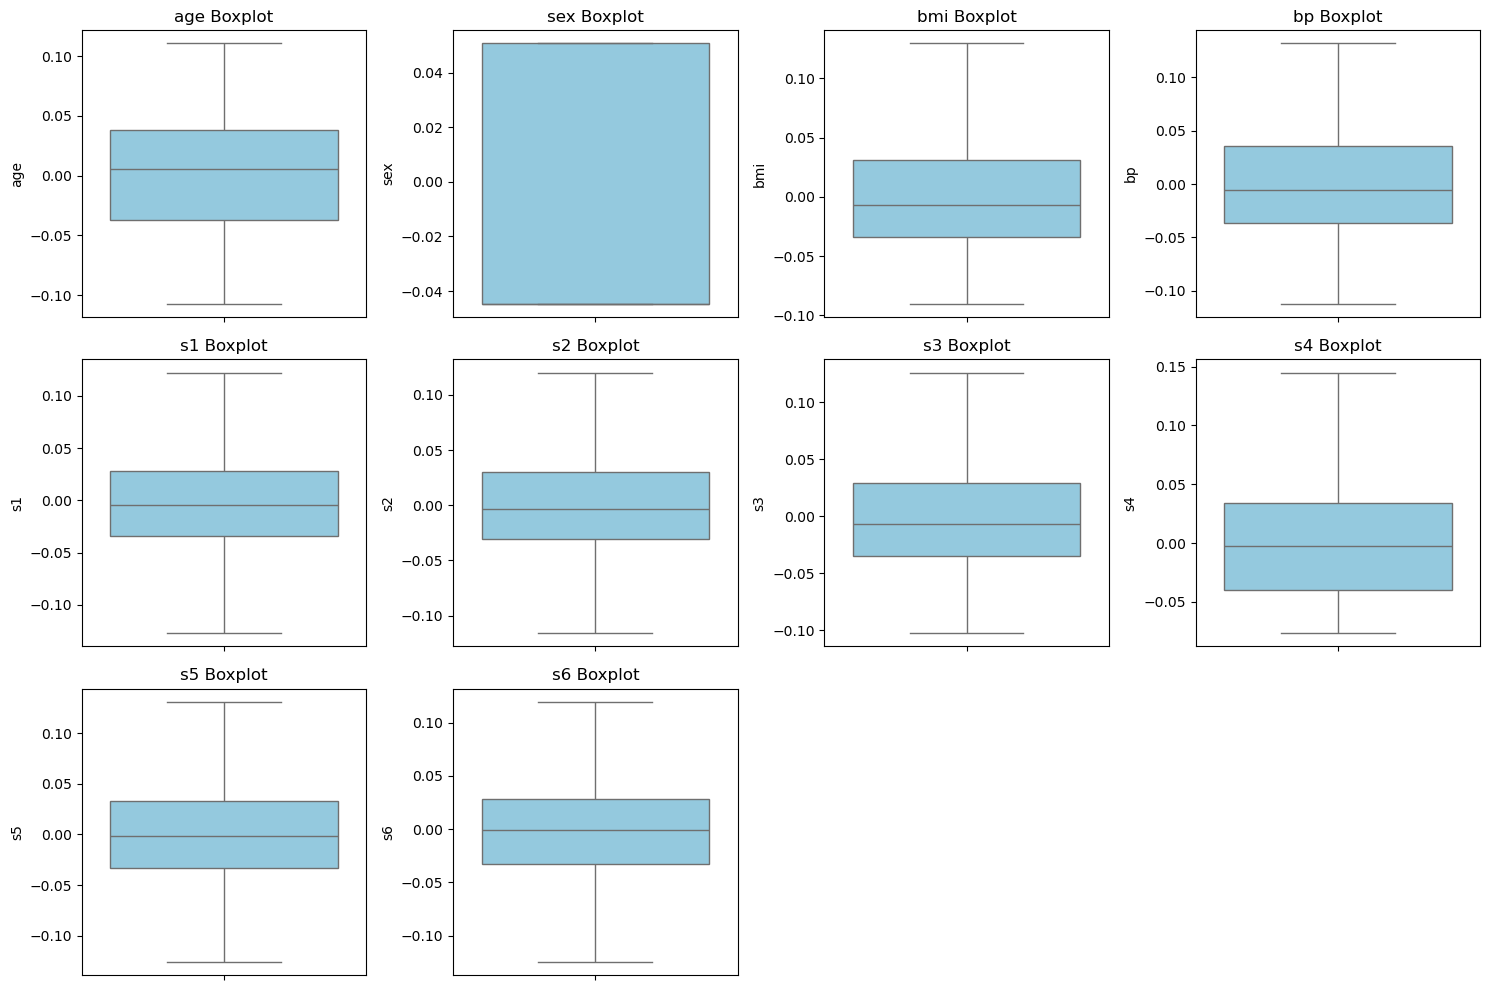

In [52]:
#M-2

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_capped.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_capped[col], color='skyblue')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

##### Since there are no dots or extra points anywhere in the graph (they are usually outliers) we can
##### determine that outliers have been taken care of

In [60]:
#duplicate row checking (to avoid redundancy)
print("Duplicate rows:", df_capped.duplicated().sum())

Duplicate rows: 0


# Finding most suitable Features

<Figure size 1000x600 with 0 Axes>

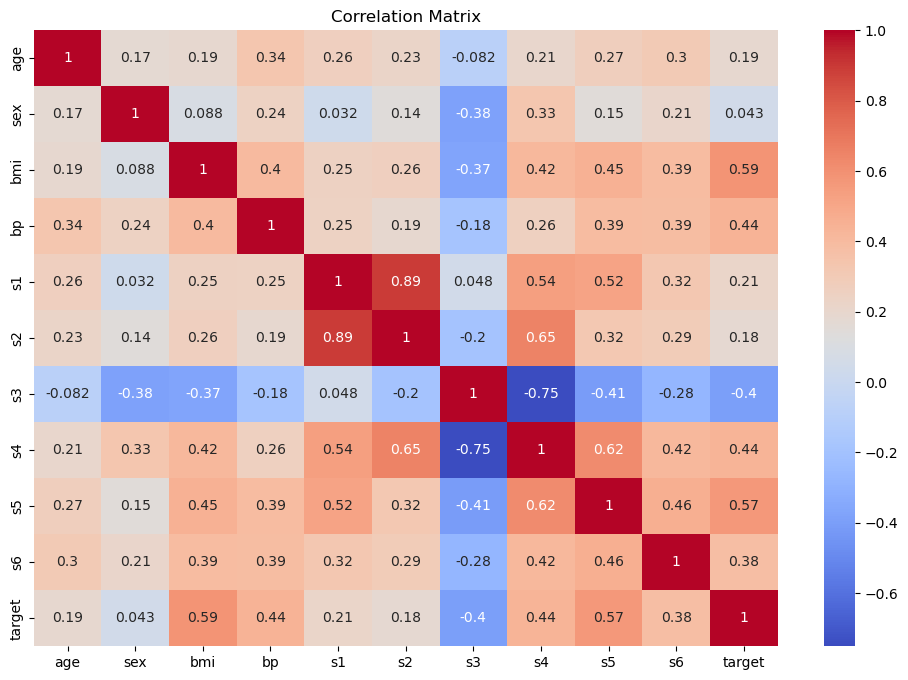

In [72]:
#correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_capped.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [74]:
correlations = df_capped.corr() #this calculates the correlation coeff for each pair of columns possible
print(correlations['target'].sort_values(ascending=False)) # since we need only strong corr with target so we segregate it


target    1.000000
bmi       0.586965
s5        0.566320
bp        0.441482
s4        0.435153
s6        0.380456
s1        0.213454
age       0.187889
s2        0.179048
sex       0.043062
s3       -0.401010
Name: target, dtype: float64


##### By this we can keep the values `s5`, `bmi`, `bp`, `s4`, `s3` (All between -1 to -0.4 and 0.4 to 1)
##### We should drop `sex` as it has weak correlation
##### High correlation with `bmi` suggests that higher bmi relates to worse disease progression

In [81]:
top_features = ['bmi', 's5', 'bp', 's4', 's3']
optional_features = ['age', 's1', 's2' ]
# df = df.drop(columns=['sex'])  ## i have already deleted it so i have commented it

# Visualization

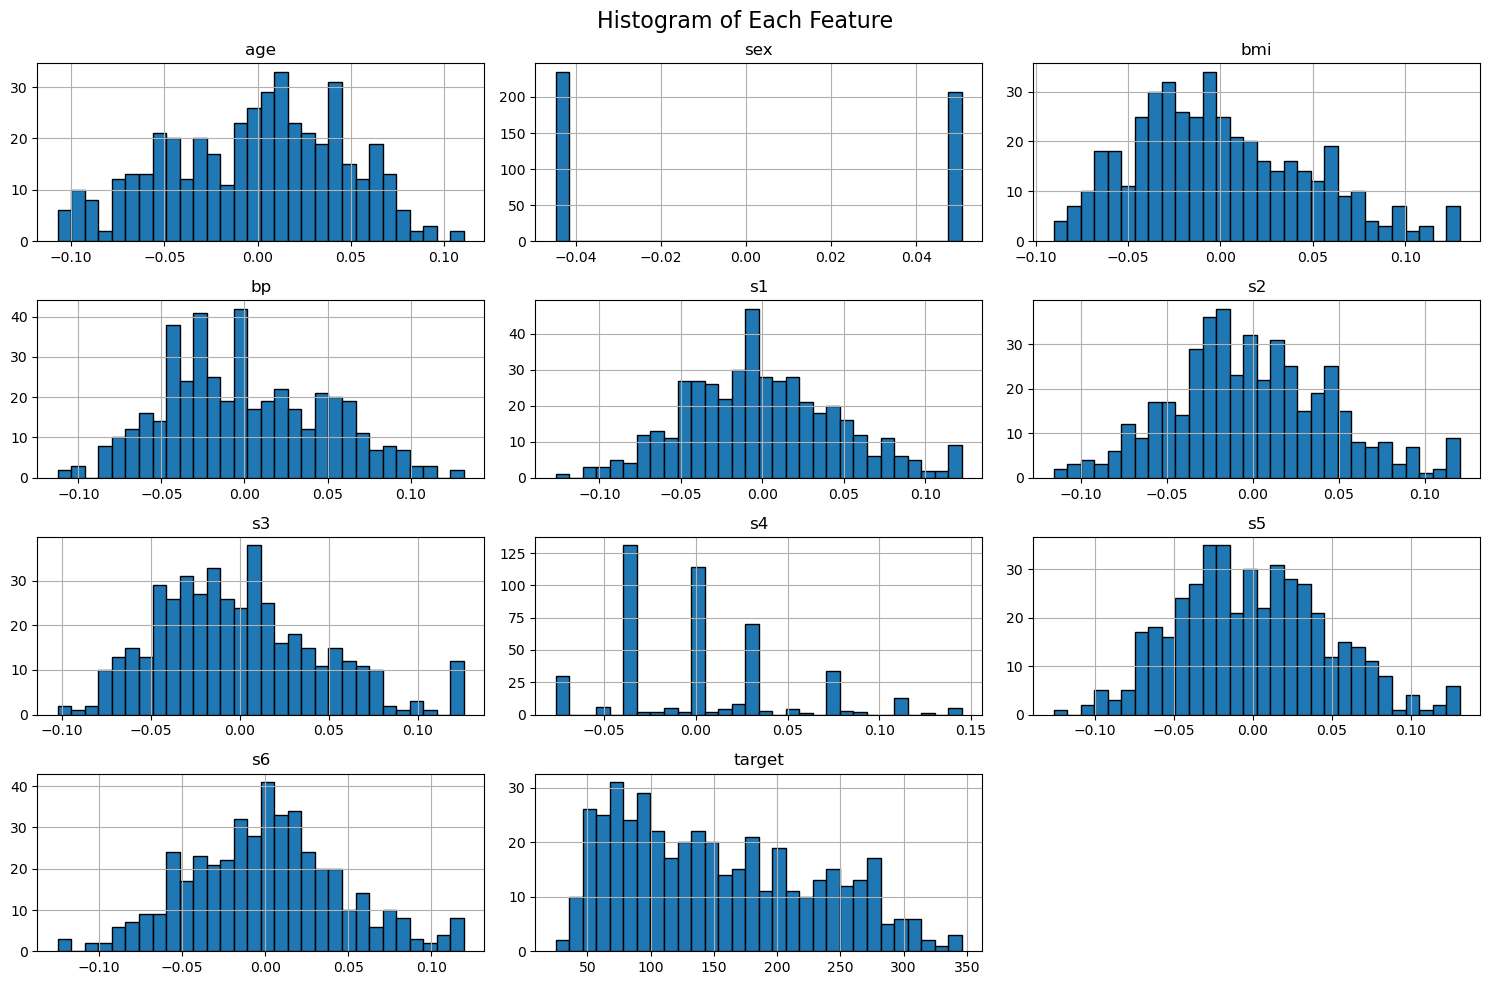

In [83]:
df_capped.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram of Each Feature", fontsize=16)
plt.tight_layout()
plt.show()

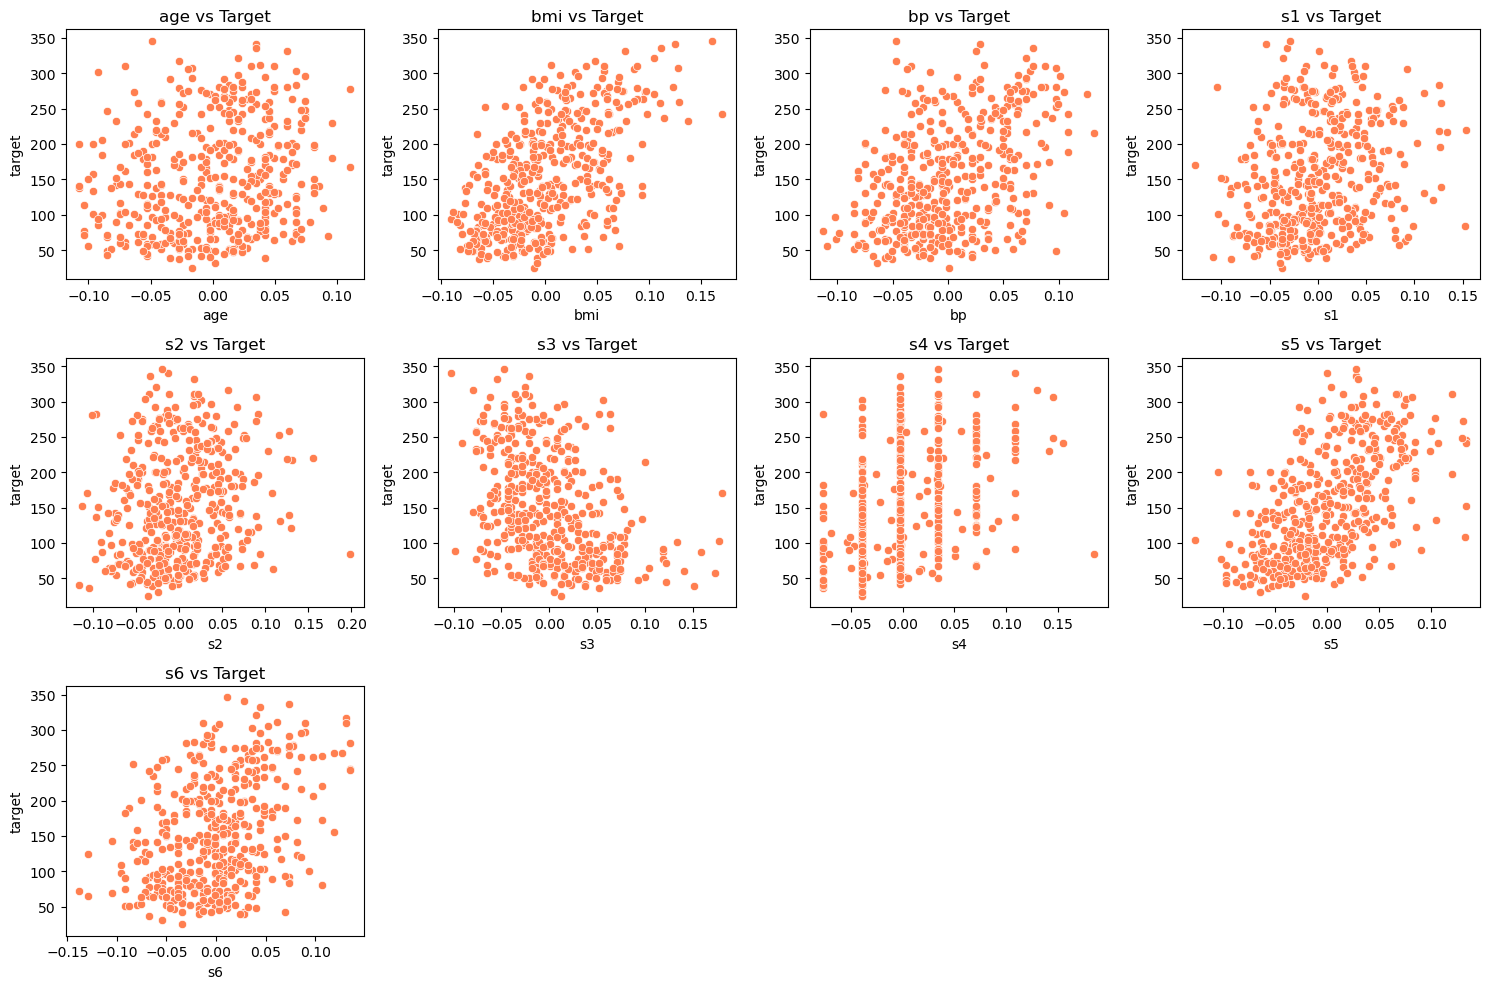

In [74]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df[col], y=df['target'], color='coral')
    plt.title(f"{col} vs Target")
    plt.tight_layout()
plt.show()

# Selecting best features

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(columns=['target'])
y = df['target'] 


In [91]:
#statistically checking whether our ideology of correlation manualyy was correct or not
for k in [5, 6, 7, 8]:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print(f"k={k}: {list(selected_features)}")


k=5: ['bmi', 'bp', 's3', 's4', 's5']
k=6: ['bmi', 'bp', 's3', 's4', 's5', 's6']
k=7: ['bmi', 'bp', 's1', 's3', 's4', 's5', 's6']
k=8: ['age', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']


In [94]:
top_features

['bmi', 's5', 'bp', 's4', 's3']

In [96]:
optional_features

['age', 's1', 's2']

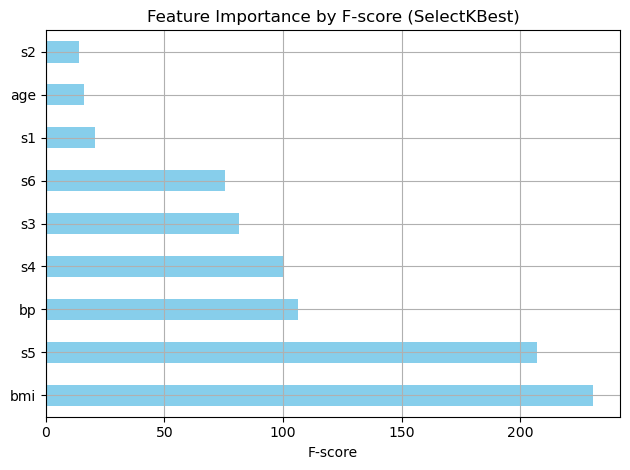

In [98]:
#another way also 
scores = selector.scores_
feature_scores = pd.Series(scores, index=X.columns)

# Sort and plot
feature_scores.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance by F-score (SelectKBest)")
plt.xlabel("F-score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
#so we will be using k =5 as it is correct wrt our prediction

In [102]:
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Top Features:", list(selected_features))

Top Features: ['bmi', 'bp', 's3', 's4', 's5']


##### So now lets clean our dataset

In [106]:
df_clean = df_capped[selected_features.tolist() + ['target']]
df_clean

bmi        bp        s3        s4        s5  target
0    0.061696  0.021872 -0.043401 -0.002592  0.019907   151.0
1   -0.051474 -0.026328  0.074412 -0.039493 -0.068332    75.0
2    0.044451 -0.005670 -0.032356 -0.002592  0.002861   141.0
3   -0.011595 -0.036656 -0.036038  0.034309  0.022688   206.0
4   -0.036385  0.021872  0.008142 -0.002592 -0.031988   135.0
..        ...       ...       ...       ...       ...     ...
437  0.019662  0.059744 -0.028674 -0.002592  0.031193   178.0
438 -0.015906 -0.067642 -0.028674  0.034309 -0.018114   104.0
439 -0.015906  0.017293 -0.024993 -0.011080 -0.046883   132.0
440  0.039062  0.001215 -0.028674  0.026560  0.044529   220.0
441 -0.073030 -0.081413  0.125954 -0.039493 -0.004222    57.0

[442 rows x 6 columns]

##### Now we should traintest the data as preprocessing is part is moreover done

In [116]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('target', axis=1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

#### Since, we find Regression models more suitable for our given dataset, we are gonna train our models one by one in those and find out which one is better for our dataset and if we require any such parameter tuning

#### First, let's start with Linear Regression model as it is simple and easy to interpret
#### We are gonna be using our top 5 features only for now as they are best selected ones 

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # this is our instance of LR model
model.fit(X_train, y_train)  # fitting the training set to the model instance

LinearRegression()

#### Now, I believe that we should predict and evaluate if our model is actually producing some good results or not
#### For evaluating , we'll be cheking it's $R^{2}$ score, MAE and MSE (as it is good for Regression model evalution)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

results = {
    "Model": "Linear Regression",
    "R2": r2,
    "MAE": mae,
    "MSE": mse
} # I stored the LR evaluation scores in a dictionary for now but later we are gonna make it a list so that i can add other model results also to compare 
print(results)

{'Model': 'Linear Regression', 'R2': 0.44428071926202883, 'MAE': 43.78151554213278, 'MSE': 2944.2850789262698}


#### Conclusions:
#### So for our current LR model we cannot say much since we haven't tried other Regression models yet, but still the scores are good enough really.
#### Let's try plotting this so we get an idea of Actual vs predicted values to visually get an idea how good it's performing

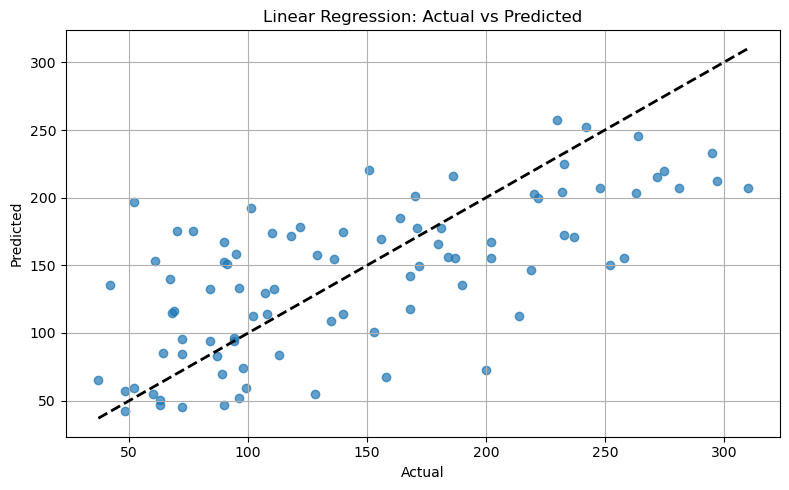

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # 8 inches wide and 5 inches tall image ke liye space banana
plt.scatter(y_test, y_pred, alpha=0.7) # alpha used is for transparancy of the points more the alpha more opaque it is
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # helps draw me the reference line lw is line width and k-- means black dashed line
plt.xlabel("Actual") # humare y_test values
plt.ylabel("Predicted") # humare y_pred values
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

#### This below is for just basic underestanding of how i made a function to evaluate all models one by one and this makes it easier for me and i dont need to rewrite the code for each code and plus this organises all models evaluation for me to easily compare  

In [130]:
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    })
evaluate_model("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

               Model        R2        MAE          MSE
0  Linear Regression  0.444281  43.781516  2944.285079


#### Now i first evaluated all models at their normal configurations so that i get an idea which one is best without any parameter tuning after that we will tune all of them accordinly to see which one is overall the best one

In [251]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
results = []
# Linear Regression
evaluate_model("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)

# Ridge Regression (normal) first here alpha = 1.0 by default
evaluate_model("Ridge Regression", Ridge(), X_train, y_train, X_test, y_test)

# Lasso Regression (default) first here alpha = 1.0 by default
evaluate_model("Lasso Regression", Lasso(), X_train, y_train, X_test, y_test)

# Random Forest
evaluate_model("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test)


In [253]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))


               Model        R2        MAE          MSE
0  Linear Regression  0.444281  43.781516  2944.285079
3      Random Forest  0.422442  44.580562  3059.987574
1   Ridge Regression  0.414622  46.274806  3101.420430
2   Lasso Regression  0.356593  49.912271  3408.865416


#### Here, we see that Linear Regression is the best one among all 4 without any tuning 
#### Now, let's try tuning Ridge and Lasso and find their best alpha and then let's check which one performs better

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define alpha values to try (we'll use it for both lasso and ridge)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# grid search setup for Ridge model 
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

#  this is to find best ridge alpha
best_ridge_alpha = ridge_cv.best_params_['alpha']
print("Best Ridge Alpha:", best_ridge_alpha)

# grid search for Lasso model 
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring='r2', cv=5)
lasso_cv.fit(X_train, y_train)

# best lasso alpha
best_lasso_alpha = lasso_cv.best_params_['alpha']
print("Best Lasso Alpha:", best_lasso_alpha)


In [ ]:
# now we train both ridge and lasso at their best alpha tuned

# Ridge Regression (normal) first here alpha = 1.0 by default
evaluate_model("Ridge Regression(tuned)", Ridge(alpha = 0.1), X_train, y_train, X_test, y_test)

# Lasso Regression (default) first here alpha = 1.0 by default
evaluate_model("Lasso Regression(tuned)", Lasso(alpha = 0.1), X_train, y_train, X_test, y_test)


In [ ]:
# Tuning for RForest 

In [259]:

# Define param grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(rf, param_grid, scoring='r2', cv=3, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Best parameters
best_rf_params = rf_cv.best_params_
print("Best Random Forest Params:", best_rf_params)


Best Random Forest Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [261]:
evaluate_model("Random Forest(tuned)", RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_split=10,random_state=42), X_train, y_train, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))

                     Model        R2        MAE          MSE
6     Random Forest(tuned)  0.458844  43.772871  2867.124664
5  Lasso Regression(tuned)  0.455047  43.493757  2887.243282
4  Ridge Regression(tuned)  0.453527  43.567261  2895.296187
0        Linear Regression  0.444281  43.781516  2944.285079
3            Random Forest  0.422442  44.580562  3059.987574
1         Ridge Regression  0.414622  46.274806  3101.420430
2         Lasso Regression  0.356593  49.912271  3408.865416


In [ ]:
# Model comparison ke liye graph
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, y='Model', x='R2',hue = "Model")
plt.title('Model Comparison by R² Score', fontsize=14)
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# def highlight_best(s):
#     if s.name in ['R2']:
#         return ['background-color: lightgreen' if v == s.max() else '' for v in s]
#     else:
#         return ['' for _ in s]

# results_df.style.apply(highlight_best)


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_test, y=y_pred_rf_best, color='teal', edgecolor='white', s=80)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect prediction line
# plt.xlabel("Actual Target Values")
# plt.ylabel("Predicted Target Values")
# plt.title("Random Forest (Tuned) - Actual vs Predicted")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# # Calculate residuals
# residuals = y_test - y_pred_rf_best

# # Plot residuals
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_pred_rf_best, y=residuals, color='orange', edgecolor='black', s=70)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals (Actual - Predicted)")
# plt.title("Residual Plot - Random Forest (Tuned)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

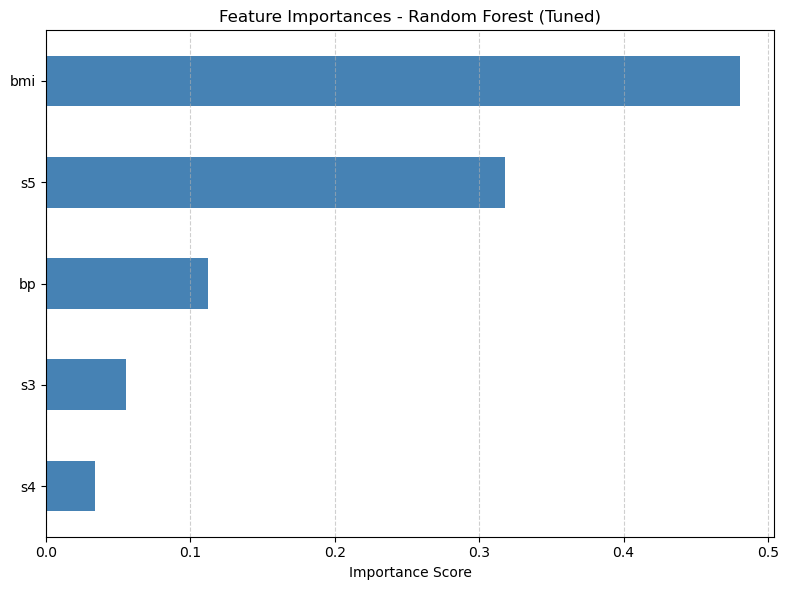

In [123]:
import numpy as np

# Get feature names and their importances
importances = rf_best.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
feature_importance_df.plot(kind='barh', color='steelblue')
plt.title("Feature Importances - Random Forest (Tuned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()